# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

In [1]:
from fastai import *
from fastai.vision import *

Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

In [4]:
folder = 'powdery_mildew'
file = 'urls_powdery_mildew.txt'

In [17]:
folder = 'blight'
file = 'urls_blight.txt'

In [22]:
folder = 'rust'
file = 'urls_rust.txt'

In [26]:
folder = 'mosaic'
file = 'urls_mosaic.txt'

You will need to run this line once per each category.

In [2]:
path = Path('data/plant_diseases')

In [5]:
dest = path / folder
dest.mkdir(parents=True, exist_ok=True)

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![uploaded file](images/download_images/upload.png)

## Download images

Now you will need to download you images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename and the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [6]:
classes = ['powdery_mildew', 'blight', 'rust', 'mosaic']

Download images for powdery mildew:

In [12]:
download_images(path / file, dest, max_pics=200)

Error https://www.skynursery.com/wp-content/uploads/2016/07/PowderyMildewOnSquash.jpg HTTPSConnectionPool(host='www.skynursery.com', port=443): Max retries exceeded with url: /wp-content/uploads/2016/07/PowderyMildewOnSquash.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')])")))


Download images for blight:

In [21]:
download_images(path / file, dest, max_pics=200)

Error https://www.veggiegardener.com/wp-content/uploads/sites/3/2009/06/Tips-for-Preventing-and-Treating-Tomato-Blights.jpg HTTPConnectionPool(host='127.0.0.1', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fc491b62e48>: Failed to establish a new connection: [Errno 111] Connection refused'))
Error https://extension.umd.edu/sites/default/files/_images/programs/grow_it_eat_it/diseases/EarlyBlight/20080710-early%20blight%20lesions%20with%20yellow%20haloes.jpg HTTPSConnectionPool(host='extension.umd.edu', port=443): Max retries exceeded with url: /sites/default/files/_images/programs/grow_it_eat_it/diseases/EarlyBlight/20080710-early%20blight%20lesions%20with%20yellow%20haloes.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')])")))
Error https://extension.umd.edu/sites/default/files/_images/programs/grow_it_eat_it/diseases/EarlyBligh

Download images for rust:

In [25]:
download_images(path / file, dest, max_pics=200)

Error https://extension.umd.edu/sites/default/files/_images/programs/hgic/Diseases/CedarAppleRustGalls.jpg HTTPSConnectionPool(host='extension.umd.edu', port=443): Max retries exceeded with url: /sites/default/files/_images/programs/hgic/Diseases/CedarAppleRustGalls.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')])")))
Error http://agriculture.vic.gov.au/__data/assets/image/0014/228002/stem-rust-example.jpg HTTPConnectionPool(host='agriculture.vic.gov.au', port=80): Read timed out. (read timeout=4)
Error http://agriculture.vic.gov.au/__data/assets/image/0019/228025/blueberry-rust2.jpg HTTPConnectionPool(host='agriculture.vic.gov.au', port=80): Read timed out. (read timeout=4)


Download images for mosaic:

In [28]:
download_images(path / file, dest, max_pics=200)

Error http://nwdistrict.ifas.ufl.edu/phag/files/2014/11/Paret-Fig-4.jpg HTTPConnectionPool(host='nwdistrict.ifas.ufl.edu', port=80): Read timed out. (read timeout=4)
Error x-raw-image:///225f4da7727fd1423ba9342df7c704665f43a39b6852dc6a0cac295f63fe2824 No connection adapters were found for 'x-raw-image:///225f4da7727fd1423ba9342df7c704665f43a39b6852dc6a0cac295f63fe2824'


In [ ]:
# If you have problems download, try with `max_workers=0` to see exceptions:
# download_images(path/file, dest, max_pics=20, max_workers=0)

Then we can remove any images that can't be opened:

In [29]:
for c in classes:
    print(c)
    verify_images(path / c, delete=True, max_workers=8)

powdery_mildew


cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/powdery_mildew/00000087.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/powdery_mildew/00000076.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/powdery_mildew/00000181.jpeg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/powdery_mildew/00000162.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/powdery_mildew/00000113.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/powdery_mildew/00000099.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/powdery_mildew/00000097.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/powdery_mildew/00000021.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/powdery_mildew/00000184.jpeg'
blight


cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/blight/00000119.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/blight/00000193.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/blight/00000044.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/blight/00000169.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/blight/00000081.jpg'
rust


cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/rust/00000138.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/rust/00000043.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/rust/00000072.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/rust/00000052.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/rust/00000012.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/rust/00000193.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/rust/00000063.png'
mosaic


cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/mosaic/00000088.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/mosaic/00000156.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/mosaic/00000023.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/mosaic/00000148.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/mosaic/00000192.gif'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/mosaic/00000157.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/mosaic/00000179.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/mosaic/00000018.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/mosaic/00000122.jpg'
cannot identify image file '/home/cedric/course-v3/nbs/dl1/data/plant_diseases/mosaic/00000055.jpg'


## View data

In [7]:
np.random.seed(42)

In [8]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(".", folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [9]:
data.classes

['blight', 'mosaic', 'powdery_mildew', 'rust']

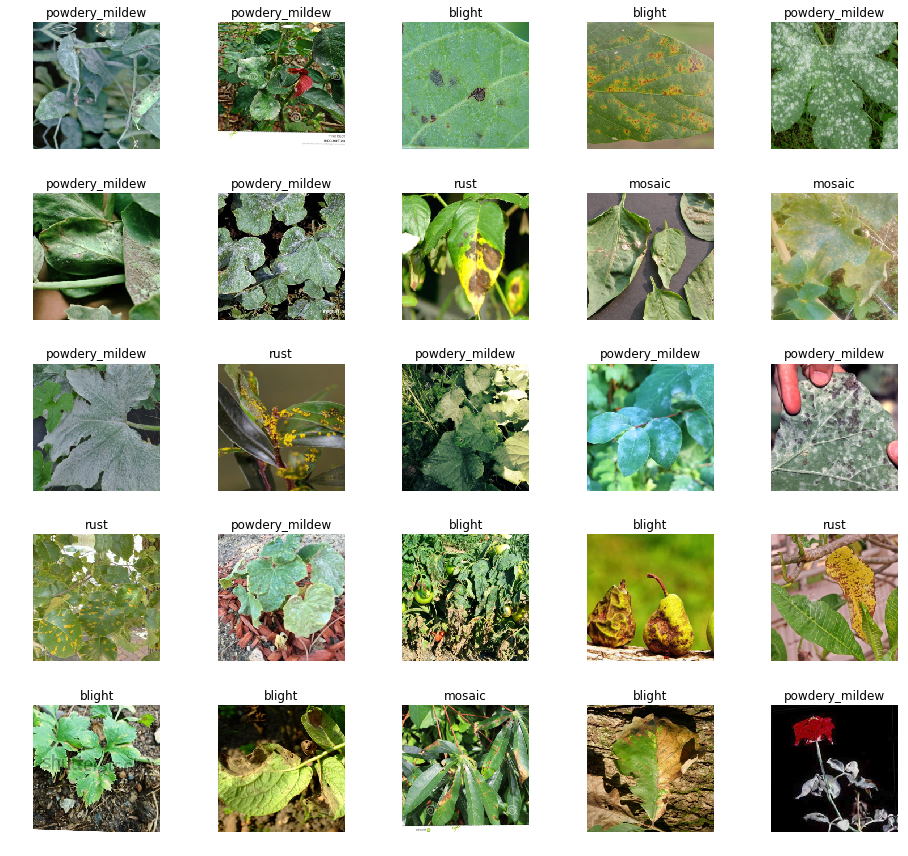

In [10]:
data.show_batch(rows=5, figsize=(13, 12))

In [11]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['blight', 'mosaic', 'powdery_mildew', 'rust'], 4, 603, 150)

## Train model

In [13]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [26]:
learn.fit_one_cycle(5)

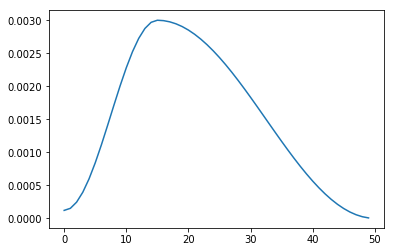

In [27]:
learn.recorder.plot_lr()

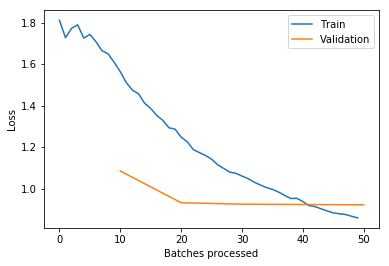

In [28]:
learn.recorder.plot_losses()

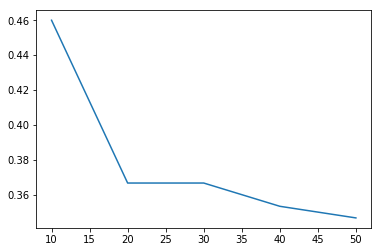

In [29]:
learn.recorder.plot_metrics()

In [31]:
learn.save('stage-1')

In [66]:
learn.load('stage-1')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (603 items)
[Category powdery_mildew, Category powdery_mildew, Category powdery_mildew, Category powdery_mildew, Category powdery_mildew]...
Path: data/plant_diseases
x: ImageItemList (603 items)
[Image (3, 340, 820), Image (3, 4032, 3024), Image (3, 318, 480), Image (3, 1147, 1473), Image (3, 768, 999)]...
Path: data/plant_diseases;
Valid: LabelList
y: CategoryList (150 items)
[Category mosaic, Category mosaic, Category blight, Category powdery_mildew, Category blight]...
Path: data/plant_diseases
x: ImageItemList (150 items)
[Image (3, 400, 400), Image (3, 375, 500), Image (3, 696, 746), Image (3, 300, 282), Image (3, 768, 768)]...
Path: data/plant_diseases;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(ker

In [67]:
learn.unfreeze()

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


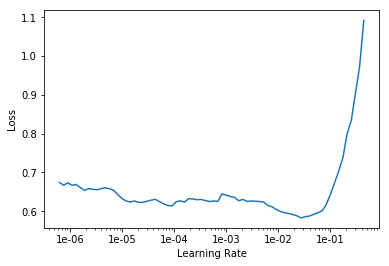

In [34]:
learn.recorder.plot()

**START: Experiment with different LR, 2 epochs**

In [45]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,3e-3))

In [42]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

In [36]:
learn.fit_one_cycle(2, max_lr=slice(3e-3,3e-2))

**END: Experiment with different LR**

**START: Experiment with LR=slice(3e-4,3e-3) and different epochs**

In [52]:
learn.fit_one_cycle(5, max_lr=slice(3e-4,3e-3))

In [60]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,3e-3))

In [63]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,3e-3))

In [68]:
learn.fit_one_cycle(10, max_lr=slice(3e-4,3e-3))

**END: Experiment with LR=slice(3e-4,3e-3) and different epochs**

**FINAL experiment**

In [71]:
learn.fit_one_cycle(4,3e-3)

In [74]:
learn.save('stage-2')

## Interpretation

In [14]:
learn.load('stage-2')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (603 items)
[Category powdery_mildew, Category powdery_mildew, Category powdery_mildew, Category powdery_mildew, Category powdery_mildew]...
Path: data/plant_diseases
x: ImageItemList (603 items)
[Image (3, 340, 820), Image (3, 4032, 3024), Image (3, 318, 480), Image (3, 1147, 1473), Image (3, 768, 999)]...
Path: data/plant_diseases;
Valid: LabelList
y: CategoryList (150 items)
[Category mosaic, Category mosaic, Category blight, Category powdery_mildew, Category blight]...
Path: data/plant_diseases
x: ImageItemList (150 items)
[Image (3, 400, 400), Image (3, 375, 500), Image (3, 696, 746), Image (3, 300, 282), Image (3, 768, 768)]...
Path: data/plant_diseases;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(ker

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

For `cycle_len=4, max_lr= 3e-3`:

By plotting the top losses, we are going to find out what were the things that we were the most wrong on, or the most confident about what we got wrong.

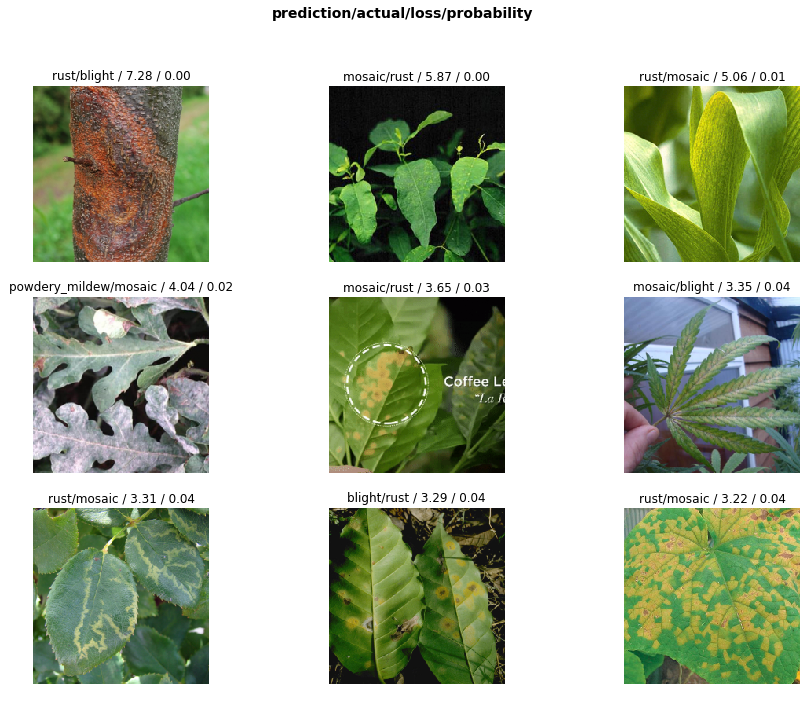

In [18]:
interp.plot_top_losses(9, figsize=(15,11))

**Confusion Matrix**

It basically shows you for every actual type of plant diseases, how many times was it predicted to be that powdery mildew or blight or rust or mosaic.

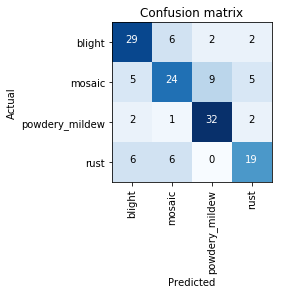

In [77]:
interp.plot_confusion_matrix()

**Most Confused**

In [20]:
interp.most_confused(min_val=5)

[('mosaic', 'powdery_mildew', 9),
 ('blight', 'mosaic', 6),
 ('rust', 'blight', 6),
 ('rust', 'mosaic', 6)]

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be there.

Using the `FileDeleter` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [78]:
from fastai.widgets import *

ModuleNotFoundError: No module named 'ipywidgets'

**Fix the previous error:**

Go to your command line and install ipywidgets package: `conda install ipywidgets`.

In [83]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In [84]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [85]:
fd = ImageCleaner(ds, idxs)

'No images to show :)'

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

In [88]:
ds, idxs = DatasetFormatter().from_similars(learn, 'stage-2', ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [89]:
ImageCleaner(ds, idxs, duplicates=True)

'No images to show :). 1 pairs were skipped since at least one of the images was deleted by the user.'

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

In [97]:
np.random.seed(42)
data = ImageDataBunch.from_csv('.', folder='.', valid_pct=0.2, csv_labels='cleaned.csv',
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [98]:
data.classes

['blight', 'mosaic', 'powdery_mildew', 'rust']

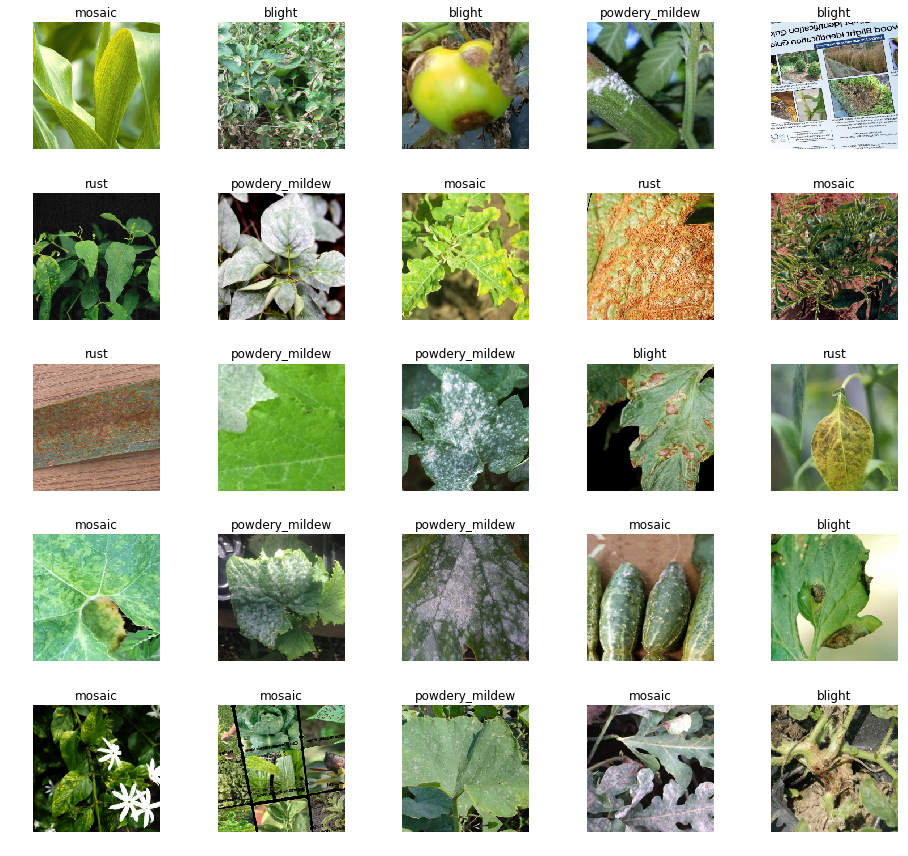

In [99]:
data.show_batch(rows=5, figsize=(13, 12))

In [100]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['blight', 'mosaic', 'powdery_mildew', 'rust'], 4, 118, 29)

**Train model**

In [112]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [101]:
learn.fit_one_cycle(5)

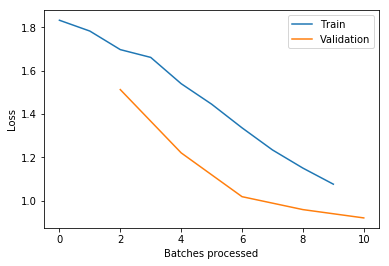

In [103]:
learn.recorder.plot_losses()

In [105]:
learn.save('stage-1-cleaned')

In [113]:
learn.load('stage-1-cleaned')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (118 items)
[Category mosaic, Category blight, Category powdery_mildew, Category blight, Category mosaic]...
Path: .
x: ImageItemList (118 items)
[Image (3, 375, 500), Image (3, 696, 746), Image (3, 300, 282), Image (3, 768, 768), Image (3, 648, 1152)]...
Path: .;
Valid: LabelList
y: CategoryList (29 items)
[Category blight, Category mosaic, Category rust, Category rust, Category powdery_mildew]...
Path: .
x: ImageItemList (29 items)
[Image (3, 450, 600), Image (3, 277, 400), Image (3, 400, 735), Image (3, 1642, 2462), Image (3, 1936, 2592)]...
Path: .;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
   

In [114]:
learn.unfreeze()

In [108]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


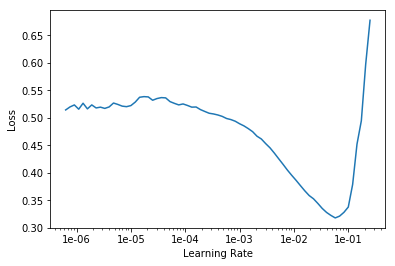

In [109]:
learn.recorder.plot()

In [110]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,3e-3))

In [115]:
learn.fit_one_cycle(4,3e-3)

In [116]:
learn.save('stage-2-cleaned')

**Interpretation**

In [117]:
learn.load('stage-2-cleaned')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (118 items)
[Category mosaic, Category blight, Category powdery_mildew, Category blight, Category mosaic]...
Path: .
x: ImageItemList (118 items)
[Image (3, 375, 500), Image (3, 696, 746), Image (3, 300, 282), Image (3, 768, 768), Image (3, 648, 1152)]...
Path: .;
Valid: LabelList
y: CategoryList (29 items)
[Category blight, Category mosaic, Category rust, Category rust, Category powdery_mildew]...
Path: .
x: ImageItemList (29 items)
[Image (3, 450, 600), Image (3, 277, 400), Image (3, 400, 735), Image (3, 1642, 2462), Image (3, 1936, 2592)]...
Path: .;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
   

In [118]:
interp = ClassificationInterpretation.from_learner(learn)

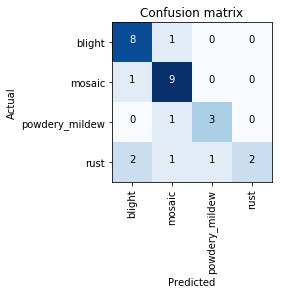

In [119]:
interp.plot_confusion_matrix()

## Putting your model in production

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [4]:
import fastai

In [5]:
fastai.defaults.device = torch.device('cpu')

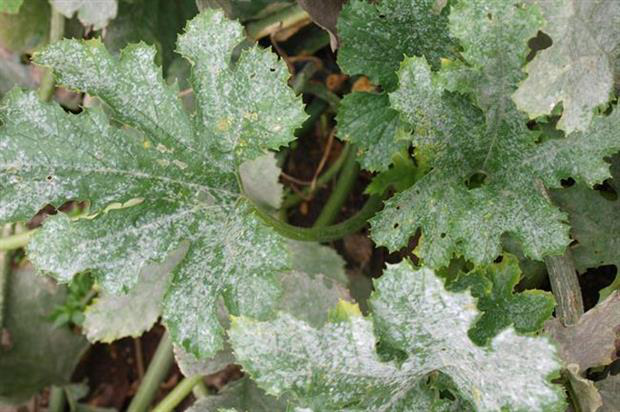

In [6]:
img = open_image(path / 'powdery_mildew' / '00000019.jpeg')
img

In [7]:
# classes = ['blight', 'rust', 'powdery_mildew', 'mosaic']
classes = ['blight', 'mosaic', 'powdery_mildew', 'rust']

In [12]:
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [16]:
learn = create_cnn(data2, models.resnet34)

In [17]:
learn.load('stage-2')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (1 items)
[]...
Path: data/plant_diseases
x: ImageItemList (1 items)
[]...
Path: data/plant_diseases;
Valid: LabelList
y: CategoryList (1 items)
[]...
Path: data/plant_diseases
x: ImageItemList (1 items)
[]...
Path: data/plant_diseases;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn

In [18]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class, pred_idx, outputs # predicted class, class index, probabilities for each class

(Category powdery_mildew, tensor(2), tensor([0.0187, 0.0111, 0.9211, 0.0490]))

In [29]:
type(pred_class)

fastai.core.Category

In [30]:
str(pred_class)

'powdery_mildew'

In [ ]:
learn.

Test with another image for blight:

In [ ]:
img = open_image(path / 'blight' / '00000128.jpg')
img

In [282]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class, outputs

(Category blight, tensor([9.3838e-01, 3.2879e-02, 2.7914e-02, 8.2262e-04]))

Test with another image for rust:

In [ ]:
img = open_image(path / 'rust' / '00000109.JPG') # 00000150.jpg, 00000118.jpg, 00000053.jpg, 00000109.JPG
img

In [284]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class, outputs

(Category rust, tensor([3.1424e-03, 1.0028e-03, 2.4786e-04, 9.9561e-01]))

Test with another image for mosaic:

In [ ]:
img = open_image(path / 'mosaic' / '00000152.jpg') # 00000114.jpg, 00000081.jpg, 00000078.jpg
img

In [286]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class, outputs

(Category mosaic, tensor([0.1542, 0.4845, 0.2877, 0.0736]))

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

Switch back to GPU:

In [11]:
import fastai

In [299]:
fastai.defaults.device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [12]:
print(fastai.defaults.device)

cuda


### Learning rate (LR) too high

In [13]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [14]:
learn.fit_one_cycle(1, max_lr=0.5)

### Learning rate (LR) too low

In [15]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [16]:
learn.fit_one_cycle(5, max_lr=1e-5)

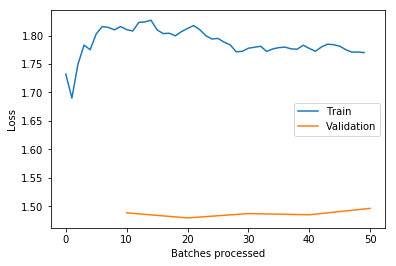

In [17]:
learn.recorder.plot_losses()

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [18]:
learn = create_cnn(data, models.resnet34, metrics=error_rate, pretrained=False)

In [19]:
learn.fit_one_cycle(1)

### Too many epochs

In [20]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [21]:
learn = create_cnn(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [22]:
learn.fit_one_cycle(40, slice(1e-6, 1e-4))